In [6]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [7]:
import os.path
from pathlib import Path

import json
import pyam
import scmdata
import pandas as pd
import numpy as np
from pymagicc.io import MAGICCData

import utils

## plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

In [8]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [9]:
data = pd.read_csv(
    str(Path(utils.DATA_DIR / "plotting_data" / "figure4" / f"{ID}.csv"))
)

<IPython.core.display.Javascript object>

In [10]:
data["max_CDR"] = (data["max_CDR"] * (-1)) / 1000
data["average_cdr_between_peak_and_15_temp"] = (
    data["average_cdr_between_peak_and_15_temp"] / 1000
)

<IPython.core.display.Javascript object>

In [11]:
colors = [
    sns.color_palette("Paired")[6],
    sns.color_palette("Paired")[7],
    sns.color_palette("Paired")[2],
    sns.color_palette("Paired")[3],
    sns.color_palette("Paired")[0],
    sns.color_palette("Paired")[1],
    sns.color_palette("Paired")[4],
    sns.color_palette("Paired")[5],
]

<IPython.core.display.Javascript object>

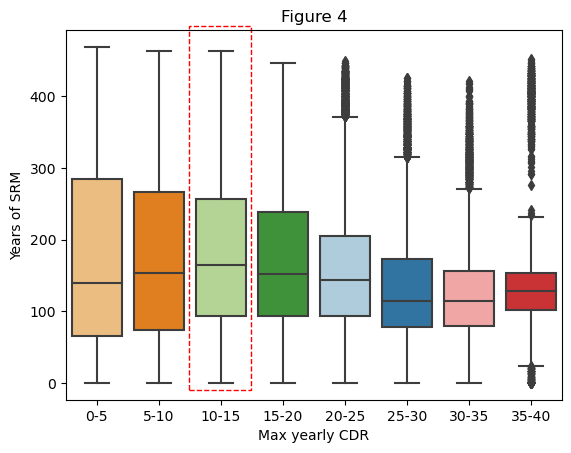

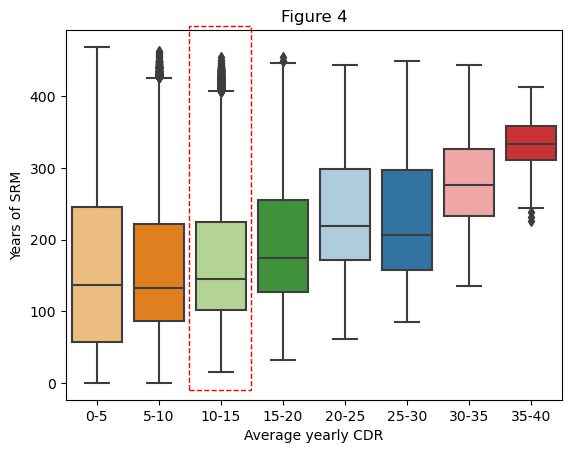

<IPython.core.display.Javascript object>

In [14]:
def plot(CDR):

    fig, ax = plt.subplots(1)

    if CDR == "max":
        column = "max_CDR"
        long = "Max yearly CDR"
    elif CDR == 'mean':
        column = 'average_cdr_between_peak_and_15_temp'
        long = "Average yearly CDR"

    data[long] = pd.cut(
        data[column],
        list(range(0, 45, 5)),
        labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40"],
    )

    ax = sns.boxplot(
        data=data,
        x=long,
        y="SRM_years",
        palette=colors,
        # notch=True,
        # medianprops={"color": "coral"},
    )

    ### add dashed box for "sustainable CDR range" (C1&C2)
    rect = Rectangle(
        (1.49, -10),
        1,
        508,
        linestyle="dashed",
        edgecolor="red",
        facecolor="None",
        clip_on=False,
    )
    ax.add_patch(rect)

    plt.xlabel(long)
    plt.ylabel("Years of SRM")
    plt.title("Figure 4")

    plt.savefig(str(Path(utils.PLOTS_DIR / "figure4" / f"{ID}_fig4.png")))
    plt.show()


plot("max")
plot("mean")
